In [1]:
from histoprep import SlideReader

# Read slide image.
reader = SlideReader("../tests/data/slide_with_ink.jpeg") # REPLACE: path
# Detect tissue.
threshold, tissue_mask = reader.get_tissue_mask(level=-1)
# Extract overlapping tile coordinates with less than 50% background.
tile_coordinates = reader.get_tile_coordinates(
    tissue_mask, width=128, overlap=0.5, max_background=0.5 # REPLACE: 128 to 512
)
# Save tile images with image metrics for preprocessing.
tile_metadata = reader.save_regions(
    "./train_tiles/", tile_coordinates, threshold=threshold, save_metrics=True,
    thumbnail_level=-1, # REMOVE
)

slide_with_ink: 100%|██████████| 390/390 [00:01<00:00, 259.65it/s]


In [2]:
!tree train_tiles --filelimit 10

train_tiles
└── slide_with_ink
    ├── metadata.parquet
    ├── properties.json
    ├── thumbnail.jpeg
    ├── thumbnail_tiles.jpeg
    ├── thumbnail_tissue.jpeg
    └── tiles [390 entries exceeds filelimit, not opening dir]

2 directories, 5 files


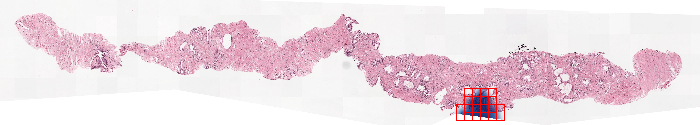

In [3]:
from histoprep.utils import OutlierDetector

# Let's wrap the tile metadata with a helper class.
detector = OutlierDetector(tile_metadata)
# Cluster tiles based on image metrics.
clusters = detector.cluster_kmeans(num_clusters=4, random_state=666)
# Visualise first cluster.
reader.get_annotated_thumbnail(
    image=reader.read_level(-1), coordinates=detector.coordinates[clusters == 0]
)

In [6]:
import shutil

# Copy images.
shutil.copy(
    "./train_tiles/slide_with_ink/thumbnail.jpeg",
    "../images/thumbnail.jpeg",
)
shutil.copy(
    "./train_tiles/slide_with_ink/thumbnail_tiles.jpeg",
    "../images/thumbnail_tiles.jpeg",
)
shutil.copy(
    "./train_tiles/slide_with_ink/thumbnail_tissue.jpeg",
    "../images/thumbnail_tissue.jpeg",
)
reader.get_annotated_thumbnail(
    image=reader.read_level(-1), coordinates=detector.coordinates[clusters == 0]
).save("../images/thumbnail_blue.jpeg")
shutil.rmtree("./train_tiles")